# The Standard Normal Distribution

## Introduction
In this lesson, we will introduce a special case of normal distributions: "The Standard Normal Distribution".

## Objectives

You will be able to:

* Compare and contrast the normal and standard normal distribution
* Calculate and interpret the z-score (standard score) for an observation from normally distributed data
* Convert between a normal and a standard normal distribution

## What is a Standard Normal Distribution?

Previously, you learned about the normal (or Gaussian) distribution, which is characterized by a bell shape curve. We also identified the mean and standard deviation as the defining parameters of this distribution. As mentioned before, normal distributions do not necessarily have the same means and standard deviations. 

The standard normal distribution, however, is a **special case** of the normal distribution. The Standard Normal Distribution is a normal distribution with a mean of 0 and a standard deviation of 1. 

<img src = "../../../images/snorm.png" width = "650">

Plotting a continuous cumulative distribution function for the standard normal distribution, the CDF would look like this:
<img src = "../../../images/cdf_stnormal.png" width ="450">

Thinking back to the standard deviation rule for normal distributions:

* $68\%$ of the area lies in the interval of 1 standard deviation from the mean, or mathematically speaking, $68\%$ is in the interval  $[\mu-\sigma, \mu+\sigma]$
*  $95\%$ of the area lies in the interval of 2 standard deviations from the mean, or mathematically speaking, $95\%$ is in the interval  $[(\mu-2\sigma), (\mu+2\sigma)]$
* $99\%$ of the area lies in the interval of 3 standard deviations from the mean, or mathematically speaking, $99\%$ is in the interval  $[(\mu-3\sigma), (\mu+3\sigma)]$


With a $\mu = 0$ and $\sigma=1$, this means that for the standard normal distribution:

* $68\%$ of the area lies between -1 and 1.
* $95\%$ of the area lies between -2 and 2.
* $99\%$ of the area lies between -3 and 3.

This simplicity makes a standard normal distribution very desirable to work with. The exciting news is that you can very easily **transform** any normal distribution to a standard normal distribution!

## Standard Score (z-score)

The standard score (more commonly referred to as a $z$-score) is a very useful statistic because it allows us to:
1. Calculate the probability of a certain score occurring within a given normal distribution and 
2. Compare two scores that are from different normal distributions.

Any normal distribution can be converted to a standard normal distribution and vice versa using this
equation:

$$\Large z=\dfrac{x-\mu}{\sigma}$$

Here, $x$ is an observation from the original normal distribution, $\mu$ is the mean and $\sigma$ is the standard deviation of the original normal distribution. 


The standard normal distribution is sometimes called the $z$-distribution. A $z$-score always reflects the number of standard deviations above or below the mean. 

### An example 

Imagine some test results follow a normal distribution with a mean score of 50 and a standard deviation of 10.
One of the students scored a 70 on the test. Using this information and $z$-scores makes it easy to tell how she performed in terms of standard deviations from the mean. Converting a test score of 70 to a $z$-score, an $x$ of 70 would be, in this case: 

$z = \dfrac{70 - 50}{10}  = 2$

By transforming the test result of 70 to a $z$-score of 2, we now know that the student's original score was 2 standard deviations above the mean score. Note that the $z$ distribution will only be a normal distribution if the original distribution of $x$ was normal.

In summary, calculating the $z$-score gives us quick and easy access to understanding how **extreme** a certain result is. Looking at the original distribution ($\mu =50$, $\sigma=10$) and the standard normal distribution ($\mu =0$, $\sigma=1$) while highlighting $x=70$ and $z=2$ gives the following result: 


<img src = "../../../images/test_std_normal.png" width ="950">

Visually, the idea is that the area under the curve, left and right from the vertical red line, are identical in the left plot and the right plot!

Thinking along these lines, you can also convert a $z$-score back to an original score $x$ by using the same formula as:

$$\large x=\mu + z\sigma$$

For the above example, this would work out as:

$x = 50 + 2*10 = 70 $

## Data Standardization

Data standardization is a common data preprocessing skill, which is used to compare a number of observations belonging to different normal distributions which may have distinct means and standard deviations. 

Standardization applies a $z$-score calculation, as shown above, on each element of the distribution. The output of this process is a **z-distribution** or a **standard normal distribution**. 
<img src="../../../images/flow.png" width=600>

Let's look at a quick example. First, we'll randomly generate two normal distributions with different means and standard deviations. Let's generate 1000 observations for each. Next, we'll use `seaborn` to plot the results.

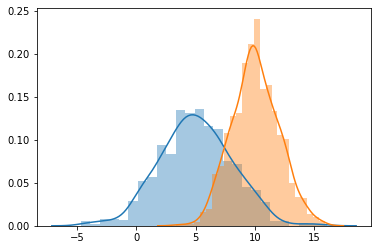

In [7]:
import numpy as np
import seaborn as sns
mean1, sd1 = 5, 3 # dist 1 
mean2, sd2 = 10, 2 # dist 2 
d1 = np.random.normal(mean1, sd1, 1000)
d2 = np.random.normal(mean2, sd2, 1000)
sns.distplot(d1);
sns.distplot(d2);

You can see that these distributions differ from each other and are not directly comparable.

For a number of machine learning algorithms and data visualization techniques, it is important that the effect of the scale of the data is removed before you start thinking about building your model. Standardization allows for this by converting the distributions into a $z$-distribution, bringing them to a common scale (with $\mu = 0$, $\sigma = 1$). Let's standardize the above distributions and look at the effect. 

# Stardardizing and visualizing distributions

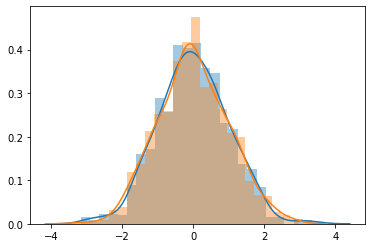

In [10]:
sns.distplot([(x - d1.mean())/d1.std() for x in d1]);
sns.distplot([(x - d2.mean())/d2.std() for x in d2]);

You see that both distributions are directly comparable on a common standard scale. As mentioned earlier, this trick will come in handy with analytics experiments while training machine learning algorithms. 

## Level up (Optional) 

+ Convert standard distributions back to the original normal distributions using the formula given above. Visualize them to see your original distributions. 


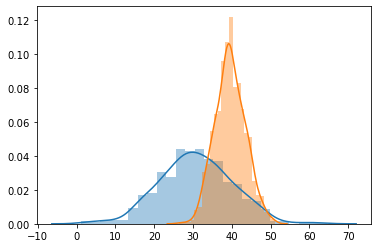

In [11]:
sns.distplot([(x + d1.mean())*d1.std() for x in d1]);
sns.distplot([(x + d2.mean())*d2.std() for x in d2]);

# Split the two Plots so we can see both distributions separately

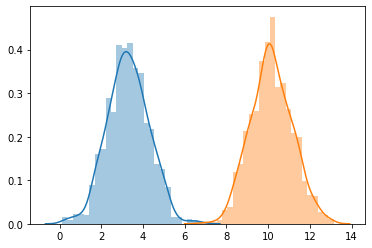

In [12]:
sns.distplot([(x + d1.mean())/d1.std() for x in d1]);
sns.distplot([(x + d2.mean())/d2.std() for x in d2]);

# The Standard Normal Distribution - Exercise


Above we learned about the formula of the $z$-score, and looked at a few toy examples to explain an observation's standard score for normally distributed data. In this lab, you'll practice by standardizing and visualize some normal distributions.

## Objectives

You will be able to:

* Calculate and interpret the z-score (standard score) for an observation from normally distributed data
* Visualize data before and after standardization to visually inspect the results

## Let's get started

> A $z$-score can help identify how many standard deviations above or below the mean a certain observation is. Every time you obtain a $z$-score, use “above” or “below” in your phrasing.

The yields of apple trees in an orchard have been recorded in the file `yield.csv`. Each observation is recorded by weighing apples from trees (in pounds) and adding their weights. There are 5000 observations in total for this data. 

## Load, visualize and give general comments about the dataset

Use pandas for loading and inspecting the data.

In [13]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [15]:
# Read the yield data as a dataframe
df = pd.read_csv('../../../data/yield.csv')
df.head()

,0
0,39.741234
1,39.872055
2,44.331164
3,46.600623
4,40.694984


In [16]:
# lets rename the column name 
df.rename(columns = {"0":"Yield"} , inplace=True)
df.head(3)

,Yield
0,39.741234
1,39.872055
2,44.331164


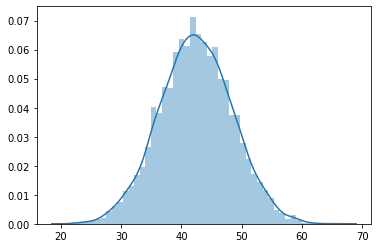

In [17]:
# Create a plot
sns.distplot(df);

### Observation:
+ The data is normally distributed as shown by the density curve

# Briefly explain what each value represents in this data set

+ Each value represents the yield from a single tree in terms of total weight of apples that were obtained from this tree.

# Define the interval bounds which contain 99% of the observations
+ Hint: Recall the empirical rule related to $3\sigma$.


In [18]:
# Perform any calculations necessary here
mean = df.mean()
sd = df.std()
mean,sd

(Yield    42.407624
 dtype: float64,
 Yield    6.003697
 dtype: float64)

#### Observations: 

+ The mean value is 42.4 and the standard deviation is around 6
+ 68% of tree yields have weight between (42.4 - 6) 36.4 and (42.4 - 6) 48.4 pounds; 
+ 95% between 30.4 and 54.4; 
+ Almost all between 24.4 and 60.4 pounds

# Compute and interpret the z-score for a tree yielding 35 pounds of apples
# Calculate z

In [19]:
z = (35 - mean)/sd
z

Yield   -1.233844
dtype: float64

+ This tree’s yield is 1.23 standard deviations below the mean yield.


# Suppose a tree has a z-score of 1.85. Interpret this z-score. What is the yield of this tree?
# Interpret the z score

+ This tree’s yield is 1.85 standard deviations above the mean

In [ ]:
# What is the yield ?

In [20]:
X = mean + 1.85*sd
X

Yield    53.514462
dtype: float64

+ Yield of this tree is 53.5 pounds. 

# Convert each tree’s yield to a z-score so the new variable is the “z-score for weight”
The units are still the apple trees. For the data set of all z-scores:

* What is the shape?
* The mean?
* The standard deviation?


Tree has a yield Mean: 0.0
Tree has a Std: 1.0


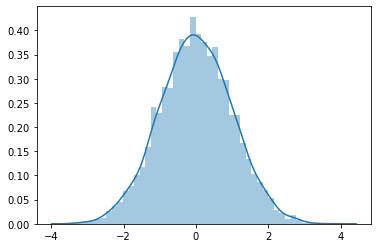

In [21]:
z_data = [(x - df['Yield'].mean())/df['Yield'].std() for x in df['Yield']]
sns.distplot(z_data)
mean = np.mean(np.array(z_data))
sd = np.std((np.array(z_data)))
print ('Tree has a yield Mean:', round(mean,2))
print ('Tree has a Std:', round(sd,2))

# Your observations

+ It is a standard normal distribution
+ Mean is 0 (it is a very small figure that rounds off to 0)
+ Standard Devaition is 1
+ This is obvious because we standardised the whole distribution

# Let's Look at our exercise from the previous Session

In [22]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
mu = 100 # mean 100
sigma = 2 # standard deviation 2
size = 1000000 # population 1 Million

In [3]:
np.random.seed(123)
pop = np.random.normal(loc= mu, scale= sigma, size = size) # $\mu$ "$\sigma$"

In [4]:
mu = pop.mean()
sigma = pop.std()

In [5]:
mu , sigma

(100.00125900261469, 2.0005171072042)

In [6]:
# Calculate the z-values for the pop
(pop - mu) / sigma

array([-1.08597932,  0.99645831,  0.28227601, ..., -0.84809067,
       -0.73862914, -1.29306785])

In [7]:
# Or we can use scipy to find the same answer for the above
z = stats.zscore(pop)
z

array([-1.08597932,  0.99645831,  0.28227601, ..., -0.84809067,
       -0.73862914, -1.29306785])

# Find the mean for the Std Normal distribution

In [8]:
# Note : the mean for the Std Normal distribution is 0
round(z.mean() , 4)

0.0

# Find the Std for the Std Normal distribution

In [9]:
# Note : the mean for the Std Normal distribution is 1
round(z.std() , 4)

1.0

# Check the skewness and curtosis

In [10]:
stats.skew(z)

0.0002286155024441295

In [11]:
stats.kurtosis(z)

-0.005837588254299586

# Plot the Standard Normal Distribution

In [12]:
x = np.linspace(-4,4,1000)
y = stats.norm.pdf(x, loc=0 , scale=1)

No handles with labels found to put in legend.


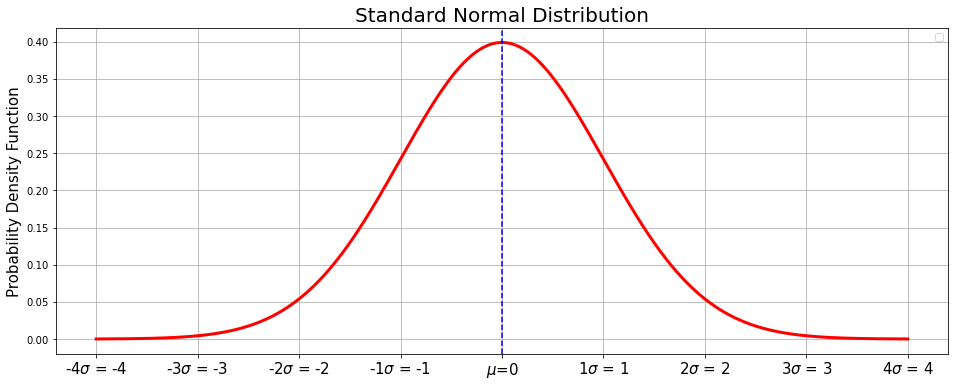

In [30]:
plt.figure(figsize=(16,6))
# plt.hist(z, bins=1000, density=True)
plt.grid()
plt.plot(x,y, linewidth=3, color="red")
plt.xticks(np.arange(-4,5,1),
          labels= ["-4$\sigma$ = -4" , "-3$\sigma$ = -3" , "-2$\sigma$ = -2" , "-1$\sigma$ = -1", 
                   "$\mu$=0" , "1$\sigma$ = 1" , "2$\sigma$ = 2" , "3$\sigma$ = 3" ,"4$\sigma$ = 4"] , fontsize=15)
# mean = y.mean()
# st_dev = y.std()
# plt.axvline(mean - st_dev, color = 'blue', label = '$\mu$=0')
plt.axvline("$\mu$=0", color="blue", linestyle="--");
plt.title("Standard Normal Distribution" , fontsize=20)
plt.ylabel("Probability Density Function" , fontsize=15)
plt.legend()
plt.show()

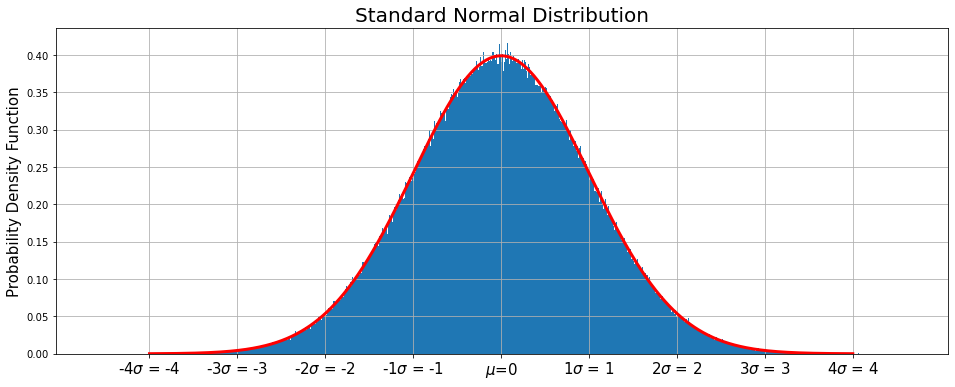

In [18]:
plt.figure(figsize=(16,6))
plt.hist(z, bins=1000, density=True)
plt.grid()
plt.plot(x,y, linewidth=3, color="red")
plt.xticks(np.arange(-4,5,1),
          labels= ["-4$\sigma$ = -4" , "-3$\sigma$ = -3" , "-2$\sigma$ = -2" , "-1$\sigma$ = -1", 
                   "$\mu$=0" , "1$\sigma$ = 1" , "2$\sigma$ = 2" , "3$\sigma$ = 3" ,"4$\sigma$ = 4"] , fontsize=15)
plt.title("Standard Normal Distribution" , fontsize=20)
plt.ylabel("Probability Density Function" , fontsize=15)
plt.show()

## Summary

In this lesson, you learned about a special case of the normal distribution called the standard normal distribution.
You also learned how to convert any normal distribution to a standard normal distribution using the $z$-score. You'll continue working on this in the following labs. 